# Assigment 6
##### Alex Foster, Natalie Kim, Mathew Spencer, Danae Vassiliadis

In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier



### Step 1
Use training and test samples for Diabetes data set that you used for Logistic Regression analysis

In [2]:
data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/data mining data/Diabetese Dataset Files/diabetes_data.csv')

In [11]:
np.random.seed(123)

In [3]:
# function to collaps diag_1 column (which has 700-900 unique levels) into 9 disease categories
def convert_diag_codes(code):
#     print (code, type(code))
    if (pd.isnull(code)):
        return 'Other'
    elif ('V' in code) or ('E' in code):
        return 'Other'
    else:
        code = float(code)
        if (code >= 390) and (code < 460) or (np.floor(code)==785):
            return 'Circulatory'
        elif (code >= 460) and (code < 520) or (np.floor(code)==786):
            return 'Respiratory'
        elif (code >= 520) and (code < 580) or (np.floor(code)==787):
            return 'Digestive'
        elif (code == 250):
            return 'Diabetes'
        elif (code >= 800) and (code < 1000):
            return 'Injury'
        elif (code >= 710) and (code < 740):
            return 'Musculoskeletal'
        elif (code >= 580) and (code < 630) or (np.floor(code)==788):
            return 'Genitourinary'
        elif (code >= 140) and (code < 240):
            return 'Neoplasms'
        else:
            return 'Other'
        
# apply conversion function to the diag_1 column 
data['diag_1'] = data['diag_1'].apply(lambda x:convert_diag_codes(x))

# convert the age column to numeric
age_dict    = {"[0-10)":5, "[10-20)":15, "[20-30)":25, "[30-40)":35, "[40-50)":45, "[50-60)":55, "[60-70)":65, "[70-80)":75, "[80-90)":85, "[90-100)":95}
data['age'] = data['age'].map(age_dict)
data['age'] = data['age'].astype('int64')

# convert 2-value categories into binary variable
data['change']      = data['change'].replace('Ch', 1)
data['change']      = data['change'].replace('No', 0)
data['gender']      = data['gender'].replace('Male', 1)
data['gender']      = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)

# merge categories to one/two level less - use domain knowledge
data['A1Cresult']     = data['A1Cresult'].replace('>7', 'Abnormal')
data['A1Cresult']     = data['A1Cresult'].replace('>8', 'Abnormal')
data['A1Cresult']     = data['A1Cresult'].replace('Norm', 'Normal')
data['A1Cresult']     = data['A1Cresult'].replace('None', 'Not tested')
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 'Abnormal')
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 'Abnormal')
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 'Normal')
data['max_glu_serum'] = data['max_glu_serum'].replace('None', 'Not tested')

# merge some categories together by studying other variables
data['admission_type_id'] = data['admission_type_id'].replace(2,1)
data['admission_type_id'] = data['admission_type_id'].replace(7,1)
data['admission_type_id'] = data['admission_type_id'].replace(6,5)
data['admission_type_id'] = data['admission_type_id'].replace(8,5)

# some columns LOOK numerical but are not. convert them to string
data['admission_type_id']        = data['admission_type_id'].map(str)
data['discharge_disposition_id'] = data['discharge_disposition_id'].map(str)

# remove duplicate patients
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

# drop columns missing 40%+ of its values
data = data.loc[:, (data.isnull().sum() / len(data)) * 100 <= 40]

# drop diag_2 and diag_3 since they're superfluous (only need diag_1). drop obviously useless columns like IDs
data.drop(['patient_nbr', 'diag_2', 'diag_3', 'encounter_id', 'admission_source_id'], axis = 1, inplace=True)  

# check missing value
def cal_missing_val(df):
    data_dict = {}
    for col in df.columns:
        data_dict[col] = (df[col].isnull().sum()/df.shape[0])*100
    return pd.DataFrame.from_dict(data_dict, orient='index', columns=['MissingValueInPercentage'])

cal_missing_val(data)

,MissingValueInPercentage
race,0.0
gender,0.0
age,0.0
admission_type_id,0.0
discharge_disposition_id,0.0
time_in_hospital,0.0
num_lab_procedures,0.0
num_procedures,0.0
num_medications,0.0
number_outpatient,0.0


In [4]:
# fill missing value for race column
data['race'].replace(np.nan, 'Missing', inplace=True)

# select categorical columns to get_dummies
categorical_cols = ['race','admission_type_id','discharge_disposition_id','diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 
     'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
     'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 
     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-pioglitazone']

# convert them to dummies
data_dummies = pd.get_dummies(data[categorical_cols], drop_first=True)

# 'readmitted' is our response variable. change it to binary
readmit_dict = {'>30':1, '<30':1, 'NO':0}
data['readmitted'] = data['readmitted'].map(readmit_dict)

# merge dummies with numerical columns
noncategorical_cols = [col for col in data.columns if col not in categorical_cols]

df = pd.concat([data[noncategorical_cols], data_dummies], axis=1)


# check for string columns 
string_columns = df.select_dtypes(include=['object'])  # 'object' is the default dtype for strings
print(string_columns) # the gender column has string values

print('before cleaning:\n', df['gender'].value_counts()) # there's 1 row in the gender column with a value of 'Unknown/Invalid'
df = df[df['gender'] != 'Unknown/Invalid'] # remove that row
print('after cleaning:\n', df['gender'].value_counts())

      gender
0          0
1          0
2          1
3          1
4          1
...      ...
98041      0
98042      0
98043      0
98045      0
98052      1

[68630 rows x 1 columns]
before cleaning:
 0                  36582
1                  32047
Unknown/Invalid        1
Name: gender, dtype: int64
after cleaning:
 0    36582
1    32047
Name: gender, dtype: int64


In [8]:
# split data between features & response
X = df.drop('readmitted', axis=1) # features
y = df['readmitted'] # target variable

# scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split data into train and test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

### Step 2
Use train data set to build K-Nearest Neighbors, SVMs and Naive Bayes to predict the Readmitted Variable

#### K-Nearest Neighbors

In [13]:
## determine optimal k
# store accuracy and recall scores for different values of k
accuracy_scores = []
recall_scores = []

# test different values of k
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled) # knn predict function expects numpy array
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_scores.append(accuracy)
    recall = recall_score(y_train, y_pred)
    recall_scores.append(recall)

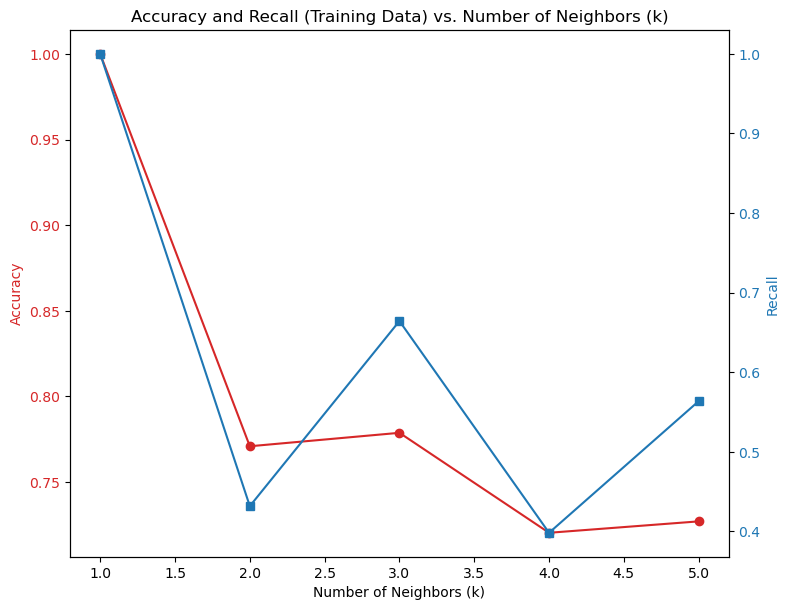

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second y-axis
color = 'tab:blue'
ax2.set_ylabel('Recall', color=color)
ax2.plot(range(1, 6), recall_scores, marker='s', linestyle='-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Accuracy and Recall (Training Data) vs. Number of Neighbors (k)')
plt.show()

In [16]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

In [28]:
print(f"KNN Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"KNN Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"KNN Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"KNN Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"KNN Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"KNN Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"KNN Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"KNN Test F1 Score: {f1_score(y_test, y_pred_test)}")

Train Accuracy: 0.7787468776019983
Train Precision: 0.7571924457257163
Train Recall: 0.6643609333058021
Train F1 Score: 0.7077456075228903


Test Accuracy: 0.5725873039001409
Test Precision: 0.4702313769751693
Test Recall: 0.39782764382907615
Test F1 Score: 0.4310099573257468


In [29]:
cm_knn_train = confusion_matrix(y_train, y_pred_train)
cm_knn_test = confusion_matrix(y_test, y_pred_test)

#### SVMs

In [31]:
svm = LinearSVC(C=1, loss='hinge')
svm.fit(X_train_scaled, y_train)
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)

/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
print(f"SVM Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"SVM Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"SVM Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"SVM Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"SVM Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"SVM Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"SVM Test F1 Score: {f1_score(y_test, y_pred_test)}")

SVM Train Accuracy: 0.6189633638634471
SVM Train Precision: 0.6357161027728313
SVM Train Recall: 0.12900061945075367
SVM Train F1 Score: 0.21447882246920996


SVM Test Accuracy: 0.6144057506435475
SVM Test Precision: 0.6324683162341581
SVM Test Recall: 0.12508952017187874
SVM Test F1 Score: 0.2088689586447434


In [32]:
# create a confusion matrix to visualize performance
cm_svm_train = confusion_matrix(y_train, y_pred_train)
cm_svm_test = confusion_matrix(y_test, y_pred_test)

#### Naive Bayes

In [35]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_train = gnb.predict(X_train_scaled)
y_pred_test = gnb.predict(X_test_scaled)

In [36]:
print(f"Naive Bayes Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Naive Bayes Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"Naive Bayes Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"Naive Bayes Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"Naive Bayes Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Naive Bayes Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"Naive Bayes Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"Naive Bayes Test F1 Score: {f1_score(y_test, y_pred_test)}")

Naive Bayes Train Accuracy: 0.44481681931723566
Naive Bayes Train Precision: 0.4182111561820667
Naive Bayes Train Recall: 0.9632975428453437
Naive Bayes Train F1 Score: 0.5832200396918413


Naive Bayes Test Accuracy: 0.44533488756131917
Naive Bayes Test Precision: 0.42057441253263705
Naive Bayes Test Recall: 0.9613272857483887
Naive Bayes Test F1 Score: 0.5851496657948271


In [37]:
cm_gnb_train = confusion_matrix(y_train, y_pred_train)
cm_gnb_test = confusion_matrix(y_test, y_pred_test)

### Step 3
Summarize performance of 3 separate models

In [38]:
# display confusion matrices to evaluate model performance
print('Confusion Matrix for KNN (train):')
print(cm_knn_train)
print('----------------------------------')
print('Confusion Matrix for KNN (test):')
print(cm_knn_test)
print('----------------------------------')
print('Confusion Matrix for Linear SVM (train):')
print(cm_svm_train)
print('----------------------------------')
print('Confusion Matrix for Linear SVM (test):')
print(cm_svm_test)
print('----------------------------------')
print('Confusion Matrix for Gaussian Naive Bayes (train):')
print(cm_gnb_train)
print('----------------------------------')
print('Confusion Matrix for Gaussian Naive Bayes (test):')
print(cm_gnb_test)

Confusion Matrix for KNN (train):
[[24541  4127]
 [ 6502 12870]]
----------------------------------
Confusion Matrix for KNN (test):
[[8456 3755]
 [5045 3333]]
----------------------------------
Confusion Matrix for Linear SVM (train):
[[27236  1432]
 [16873  2499]]
----------------------------------
Confusion Matrix for Linear SVM (test):
[[11602   609]
 [ 7330  1048]]
----------------------------------
Confusion Matrix for Gaussian Naive Bayes (train):
[[ 2708 25960]
 [  711 18661]]
----------------------------------
Confusion Matrix for Gaussian Naive Bayes (test):
[[ 1115 11096]
 [  324  8054]]


### Step 4
Build another model called the "Ensemble" model across all 7 models that you have built thus far – Logistic, Classification Trees, LDA, QDA, KNN, SVM, and Naïve Bayes for predicting the "Readmitted" variable.

The ensemble model simply takes the predictions of "Readmitted" for each observation from the 7 models that you already built. It then applies the "Majority rule". To illustrate, if the predictions from Logistic Regression, Classification Trees, LDA, QDA, KNN, SVM, and NB are Yes, Yes, Yes, No, Yes, No, No respectively for an observation, resulting in 4 predictions of Yes and 3 prediction of No, then the Ensemble model would yield a prediction of Yes, since majority of the models predict "Yes" (4 > 3). Predict all observations in Training and Test using the Ensemble model

In [41]:
# logistic regression model
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_scaled, y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

In [42]:
print(f"logistic regression Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"logistic regression Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"logistic regression Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"logistic regression Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"logistic regression Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"logistic regression Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"logistic regression Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"logistic regression Test F1 Score: {f1_score(y_test, y_pred_test)}")

logistic regression Train Accuracy: 0.6296835970024979
logistic regression Train Precision: 0.5966756294304572
logistic regression Train Recall: 0.25201321494941153
logistic regression Train F1 Score: 0.3543587137983596


logistic regression Test Accuracy: 0.6229054349409879
logistic regression Test Precision: 0.5867231638418079
logistic regression Test Recall: 0.2479111959894963
logistic regression Test F1 Score: 0.3485484141634502


In [44]:
# Classification Trees
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_scaled, y_train)
y_pred_train = tree.predict(X_train_scaled)
y_pred_test = tree.predict(X_test_scaled)

In [45]:
print(f"Classification Trees Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Classification Trees Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"Classification Trees Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"Classification Trees Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"Classification Trees Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Classification Trees Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"Classification Trees Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"Classification Trees Test F1 Score: {f1_score(y_test, y_pred_test)}")

Classification Trees Train Accuracy: 0.6282264779350542
Classification Trees Train Precision: 0.5864
Classification Trees Train Recall: 0.26486681808796203
Classification Trees Train F1 Score: 0.3649100348481616


Classification Trees Test Accuracy: 0.6209140803341591
Classification Trees Test Precision: 0.5754543060310772
Classification Trees Test Recall: 0.2608021007400334
Classification Trees Test F1 Score: 0.3589322381930185


In [48]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_train = lda.predict(X_train_scaled)
y_pred_test = lda.predict(X_test_scaled)

In [49]:
print(f"LDA Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"LDA Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"LDA Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"LDA Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"LDA Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"LDA Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"LDA Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"LDA Test F1 Score: {f1_score(y_test, y_pred_test)}")

LDA Train Accuracy: 0.5015403830141548
LDA Train Precision: 0.44236681618870016
LDA Train Recall: 0.9061532108197399
LDA Train F1 Score: 0.5945067226606157


LDA Test Accuracy: 0.504055563650493
LDA Test Precision: 0.4461230968197049
LDA Test Recall: 0.9058247791835761
LDA Test F1 Score: 0.5978179526566624


In [54]:
# cols causing collinearity
cols_to_exclude = ['discharge_disposition_id_11','discharge_disposition_id_19','discharge_disposition_id_20',
                      'discharge_disposition_id_27','chlorpropamide_Up','acetohexamide_Steady',
                      'miglitol_No','miglitol_Up','glyburide-metformin_Up','metformin-pioglitazone_Steady']

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred_train = qda.predict(X_train_scaled)
y_pred_test = qda.predict(X_train_scaled)

/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [55]:
print(f"QDA Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"QDA Train Precision: {precision_score(y_train, y_pred_train)}")
print(f"QDA Train Recall: {recall_score(y_train, y_pred_train)}")
print(f"QDA Train F1 Score: {f1_score(y_train, y_pred_train)}")

print("\n")

print(f"QDA Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"QDA Test Precision: {precision_score(y_test, y_pred_test)}")
print(f"QDA Test Recall: {recall_score(y_test, y_pred_test)}")
print(f"QDA Test F1 Score: {f1_score(y_test, y_pred_test)}")

QDA Train Accuracy: 0.43740632805995006
QDA Train Precision: 0.4124081744742202
QDA Train Recall: 0.9302601693165393
QDA Train F1 Score: 0.5714693431004138




ValueError: Found input variables with inconsistent numbers of samples: [20589, 48040]

### Step 5
Summarize results - for both Training and Test. Which of the models yielded the best prediction overall, and which models yielded the best predictors of "Yes"? Do you like the Ensemble model? Did it predict as well as you expected it to predict?